In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# Reading Data from Several Data Sources
df1= pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/Data traffic across UK.csv')
df2= pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/2021 Median weekly pay.csv')
df3= pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/ethnic minorities.csv')
df4= pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/GDP per head UK local authorities.csv')
df5= pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/Land Area of UK Local Authorities.csv')
df6= pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/Population2.csv')
df7=pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/median age and people per square km.csv')
df8= pd.read_csv('C:/Users/grego/Desktop/Data Science and Analytics MSc/MATH5872M Dissertation in Data Science and Analytics/Telecommunication/csv files of dataset/deprivation.csv')

In [3]:
df7

,Local Authority,Median Age,Population Density (People per sq. km)
0,England,40.0,432
1,North East,41.8,311
2,North West,40.3,520
3,Yorkshire and The Humber,40.1,357
4,East Midlands,41.4,309
...,...,...,...
319,Tewkesbury,44.5,229
320,Mendip,47.0,156
321,Sedgemoor,46.9,218
322,Somerset West and Taunton,47.9,131


In [4]:
df8

,Local Authority,IMD Deprivation Score
0,Hartlepool,22581.98
1,Middlesbrough,23729.10
2,Redcar and Cleveland,20348.40
3,Stockton-on-Tees,17541.72
4,Darlington,18284.63
...,...,...
312,Sutton,11415.25
313,Tower Hamlets,22507.05
314,Waltham Forest,21186.64
315,Wandsworth,14312.18


In [5]:
from functools import reduce

In [6]:
# Merge  pandas DataFrames
data_merge1 = reduce(lambda left, right:   
                     pd.merge(left , right,
                              on = ["Local Authority"]),
                     [df1, df3, df4, df5, df6, df7, df8])
data_merge1= data_merge1.set_index('Local Authority') 
data_merge1=data_merge1.reindex(columns=['Total Population','Land Area: Kilometers Square','Population Density (People per sq. km)', 'GDP per Capita',

                                         'Percentage of Ethnic Minorities', 'Median Age', 'IMD Deprivation Score', '4G Data Traffic (TB)', 'Data Traffic (TB)'])
data_merge1# Print merged DataFrame
data_merge1.rename(columns={'IMD Deprivation Score':'IMD Score'}, inplace=True)
data_merge1

,Total Population,Land Area: Kilometers Square,Population Density (People per sq. km),GDP per Capita,Percentage of Ethnic Minorities,Median Age,IMD Score,4G Data Traffic (TB),Data Traffic (TB)
Local Authority,,,,,,,,,
Birmingham,1140525,264.18,4264,26812,42.0,32.6,25319.55,9962,11434
Leeds,798786,562.03,1438,36247,14.9,35.3,18909.26,6482,7165
Manchester,555741,116.55,4781,47433,33.4,30.1,26417.75,5603,6417
Tower Hamlets,331969,20.72,16427,116624,54.8,31.6,22507.05,4286,5197
Liverpool,500474,113.96,4453,30426,11.1,34.8,25833.57,4610,5108
...,...,...,...,...,...,...,...,...,...
West Devon,56139,1160.32,48,16778,1.6,51.3,16270.10,371,412
Ribble Valley,62026,582.75,104,31239,2.2,48.1,8701.15,353,405
Copeland,68041,738.15,93,23422,1.6,47.1,19550.80,350,387


In [7]:
data_merge1.to_csv('complete dataset.csv')

In [8]:
corr_matrix=data_merge1.corr() # Get correlation matrix 
corr_matrix
corr_matrix["Data Traffic (TB)"].sort_values(ascending=False) # sort in descending order to show strength of correlation 
abscorr_matrix=pd.DataFrame(abs(corr_matrix["Data Traffic (TB)"])) # Get strength of both positive and negative correlations
print(corr_matrix["Data Traffic (TB)"].sort_values(ascending=False)[2:9])# computed correlations of features to targets

Total Population                          0.952436
Percentage of Ethnic Minorities           0.703048
Population Density (People per sq. km)    0.613171
IMD Score                                 0.484596
GDP per Capita                            0.232735
Land Area: Kilometers Square             -0.262875
Median Age                               -0.601118
Name: Data Traffic (TB), dtype: float64


array([[<AxesSubplot:xlabel='Data Traffic (TB)', ylabel='Data Traffic (TB)'>,
        <AxesSubplot:xlabel='Total Population', ylabel='Data Traffic (TB)'>,
        <AxesSubplot:xlabel='Population Density (People per sq. km)', ylabel='Data Traffic (TB)'>,
        <AxesSubplot:xlabel='IMD Score', ylabel='Data Traffic (TB)'>],
       [<AxesSubplot:xlabel='Data Traffic (TB)', ylabel='Total Population'>,
        <AxesSubplot:xlabel='Total Population', ylabel='Total Population'>,
        <AxesSubplot:xlabel='Population Density (People per sq. km)', ylabel='Total Population'>,
        <AxesSubplot:xlabel='IMD Score', ylabel='Total Population'>],
       [<AxesSubplot:xlabel='Data Traffic (TB)', ylabel='Population Density (People per sq. km)'>,
        <AxesSubplot:xlabel='Total Population', ylabel='Population Density (People per sq. km)'>,
        <AxesSubplot:xlabel='Population Density (People per sq. km)', ylabel='Population Density (People per sq. km)'>,
        <AxesSubplot:xlabel='IMD Scor

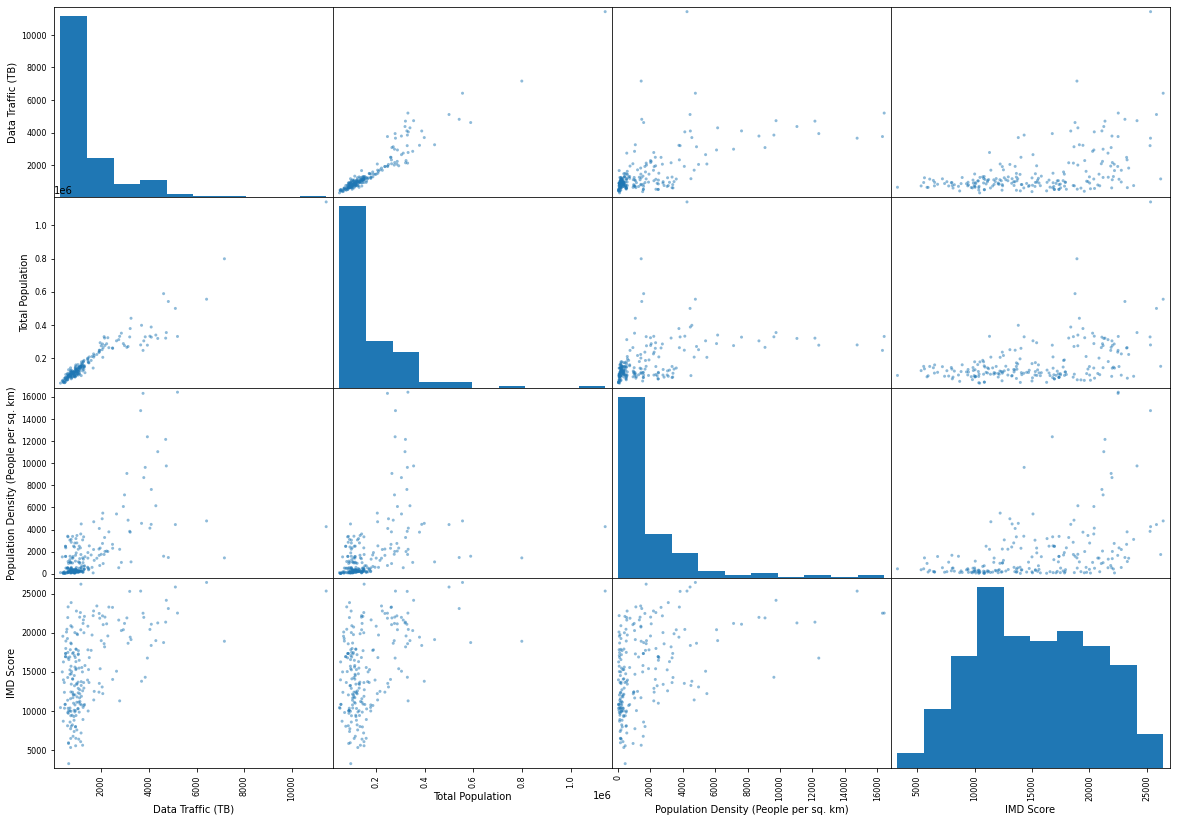

In [9]:
from pandas.plotting import scatter_matrix
attributes=["Data Traffic (TB)", "Total Population", "Population Density (People per sq. km)","IMD Score"]
scatter_matrix(data_merge1[attributes],figsize=(20,14)) # Scatter matrix of  correlations 

array([[<AxesSubplot:xlabel='Data Traffic (TB)', ylabel='Data Traffic (TB)'>,
        <AxesSubplot:xlabel='GDP per Capita', ylabel='Data Traffic (TB)'>,
        <AxesSubplot:xlabel='Land Area: Kilometers Square', ylabel='Data Traffic (TB)'>,
        <AxesSubplot:xlabel='Median Age', ylabel='Data Traffic (TB)'>],
       [<AxesSubplot:xlabel='Data Traffic (TB)', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='GDP per Capita', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Land Area: Kilometers Square', ylabel='GDP per Capita'>,
        <AxesSubplot:xlabel='Median Age', ylabel='GDP per Capita'>],
       [<AxesSubplot:xlabel='Data Traffic (TB)', ylabel='Land Area: Kilometers Square'>,
        <AxesSubplot:xlabel='GDP per Capita', ylabel='Land Area: Kilometers Square'>,
        <AxesSubplot:xlabel='Land Area: Kilometers Square', ylabel='Land Area: Kilometers Square'>,
        <AxesSubplot:xlabel='Median Age', ylabel='Land Area: Kilometers Square'>],
       [<AxesSubplot:xlabe

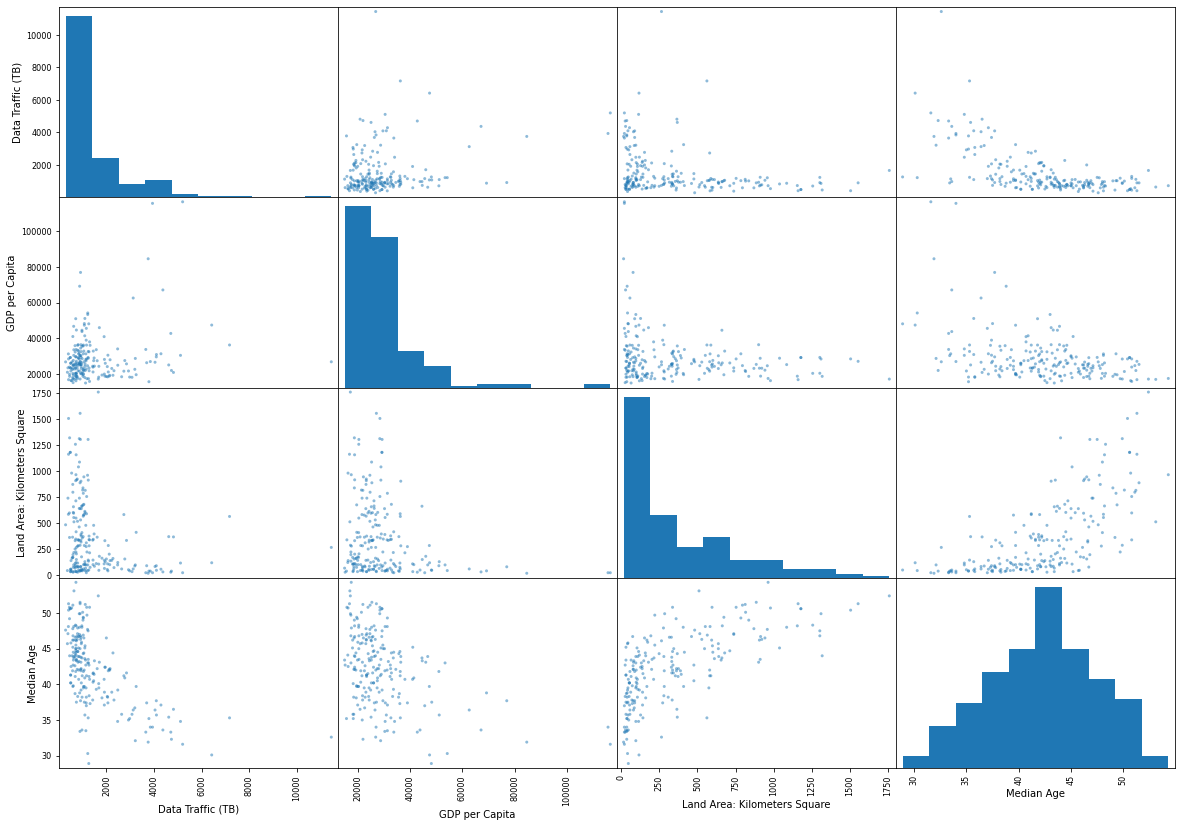

In [10]:
from pandas.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
attributes2=["Data Traffic (TB)", "GDP per Capita", "Land Area: Kilometers Square", "Median Age"]
scatter_matrix(data_merge1[attributes2],figsize=(20,14)) # Scatter matrix of  correlations  

array([[<AxesSubplot:title={'center':'Total Population'}>,
        <AxesSubplot:title={'center':'Land Area: Kilometers Square'}>,
        <AxesSubplot:title={'center':'Population Density (People per sq. km)'}>],
       [<AxesSubplot:title={'center':'GDP per Capita'}>,
        <AxesSubplot:title={'center':'Percentage of Ethnic Minorities'}>,
        <AxesSubplot:title={'center':'Median Age'}>],
       [<AxesSubplot:title={'center':'IMD Score'}>,
        <AxesSubplot:title={'center':'4G Data Traffic (TB)'}>,
        <AxesSubplot:title={'center':'Data Traffic (TB)'}>]], dtype=object)

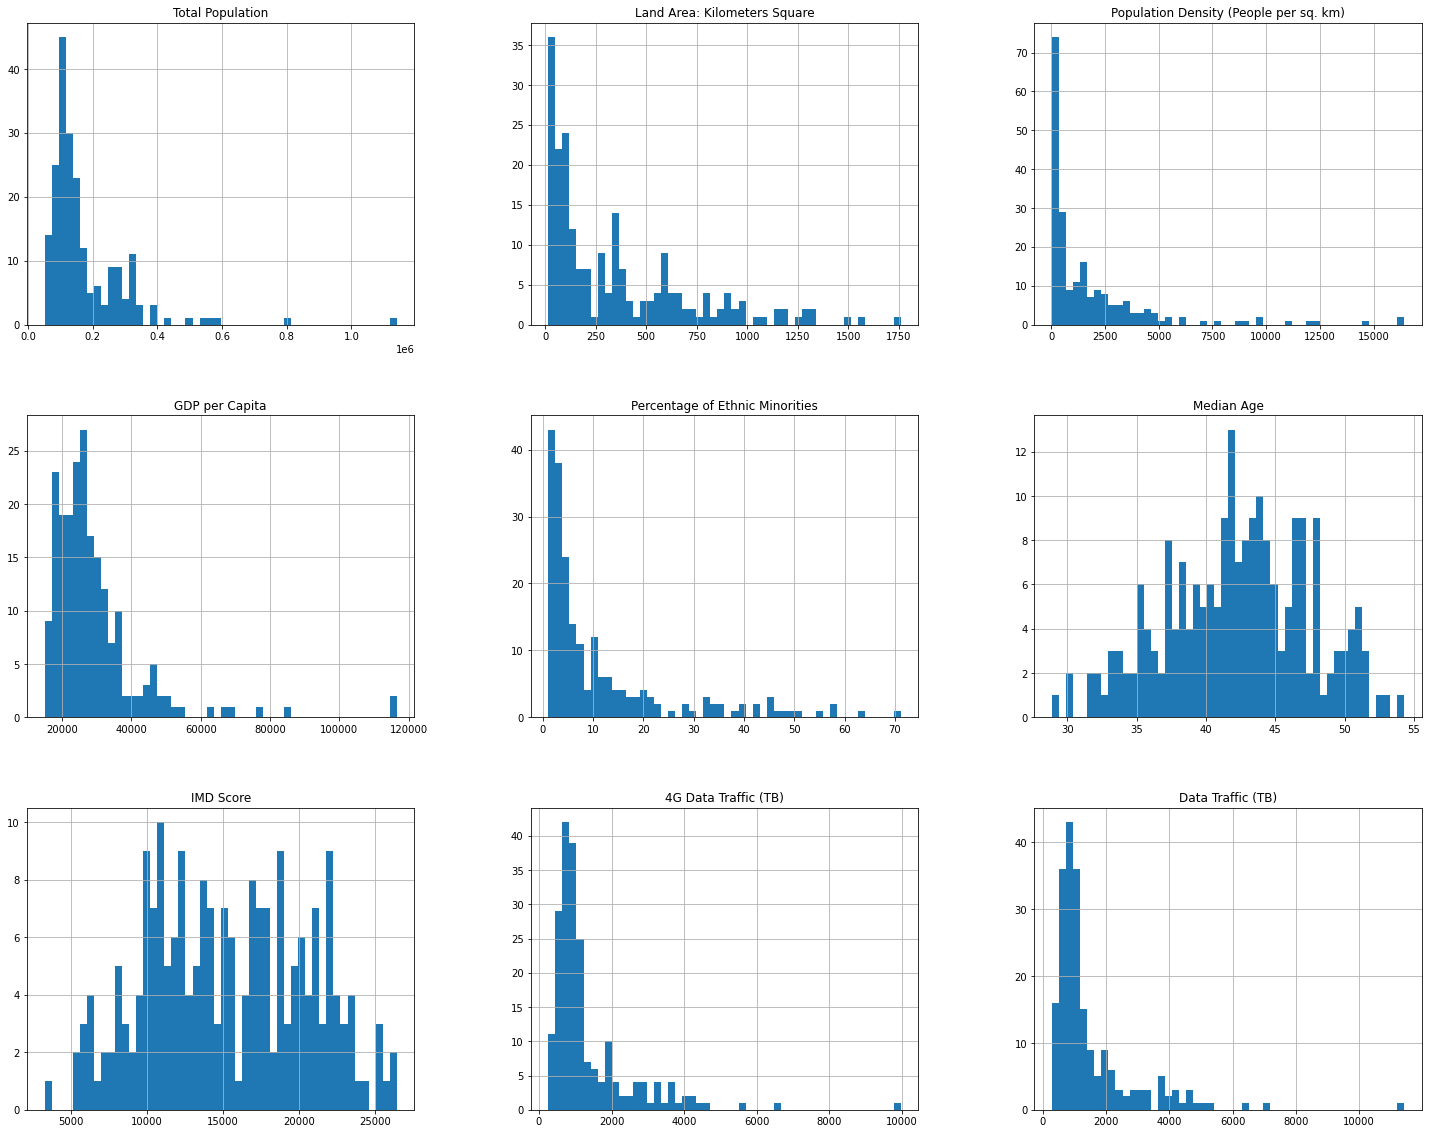

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

data_merge1.hist(bins=50,figsize=(25,20)) # Histogram of features/predictors

In [12]:
features= data_merge1.drop(columns=[ 'Data Traffic (TB)', '4G Data Traffic (TB)'])

In [13]:
features

,Total Population,Land Area: Kilometers Square,Population Density (People per sq. km),GDP per Capita,Percentage of Ethnic Minorities,Median Age,IMD Score
Local Authority,,,,,,,
Birmingham,1140525,264.18,4264,26812,42.0,32.6,25319.55
Leeds,798786,562.03,1438,36247,14.9,35.3,18909.26
Manchester,555741,116.55,4781,47433,33.4,30.1,26417.75
Tower Hamlets,331969,20.72,16427,116624,54.8,31.6,22507.05
Liverpool,500474,113.96,4453,30426,11.1,34.8,25833.57
...,...,...,...,...,...,...,...
West Devon,56139,1160.32,48,16778,1.6,51.3,16270.10
Ribble Valley,62026,582.75,104,31239,2.2,48.1,8701.15
Copeland,68041,738.15,93,23422,1.6,47.1,19550.80


array([[<AxesSubplot:title={'center':'Total Population'}>,
        <AxesSubplot:title={'center':'Land Area: Kilometers Square'}>,
        <AxesSubplot:title={'center':'Population Density (People per sq. km)'}>],
       [<AxesSubplot:title={'center':'GDP per Capita'}>,
        <AxesSubplot:title={'center':'Percentage of Ethnic Minorities'}>,
        <AxesSubplot:title={'center':'Median Age'}>],
       [<AxesSubplot:title={'center':'IMD Score'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

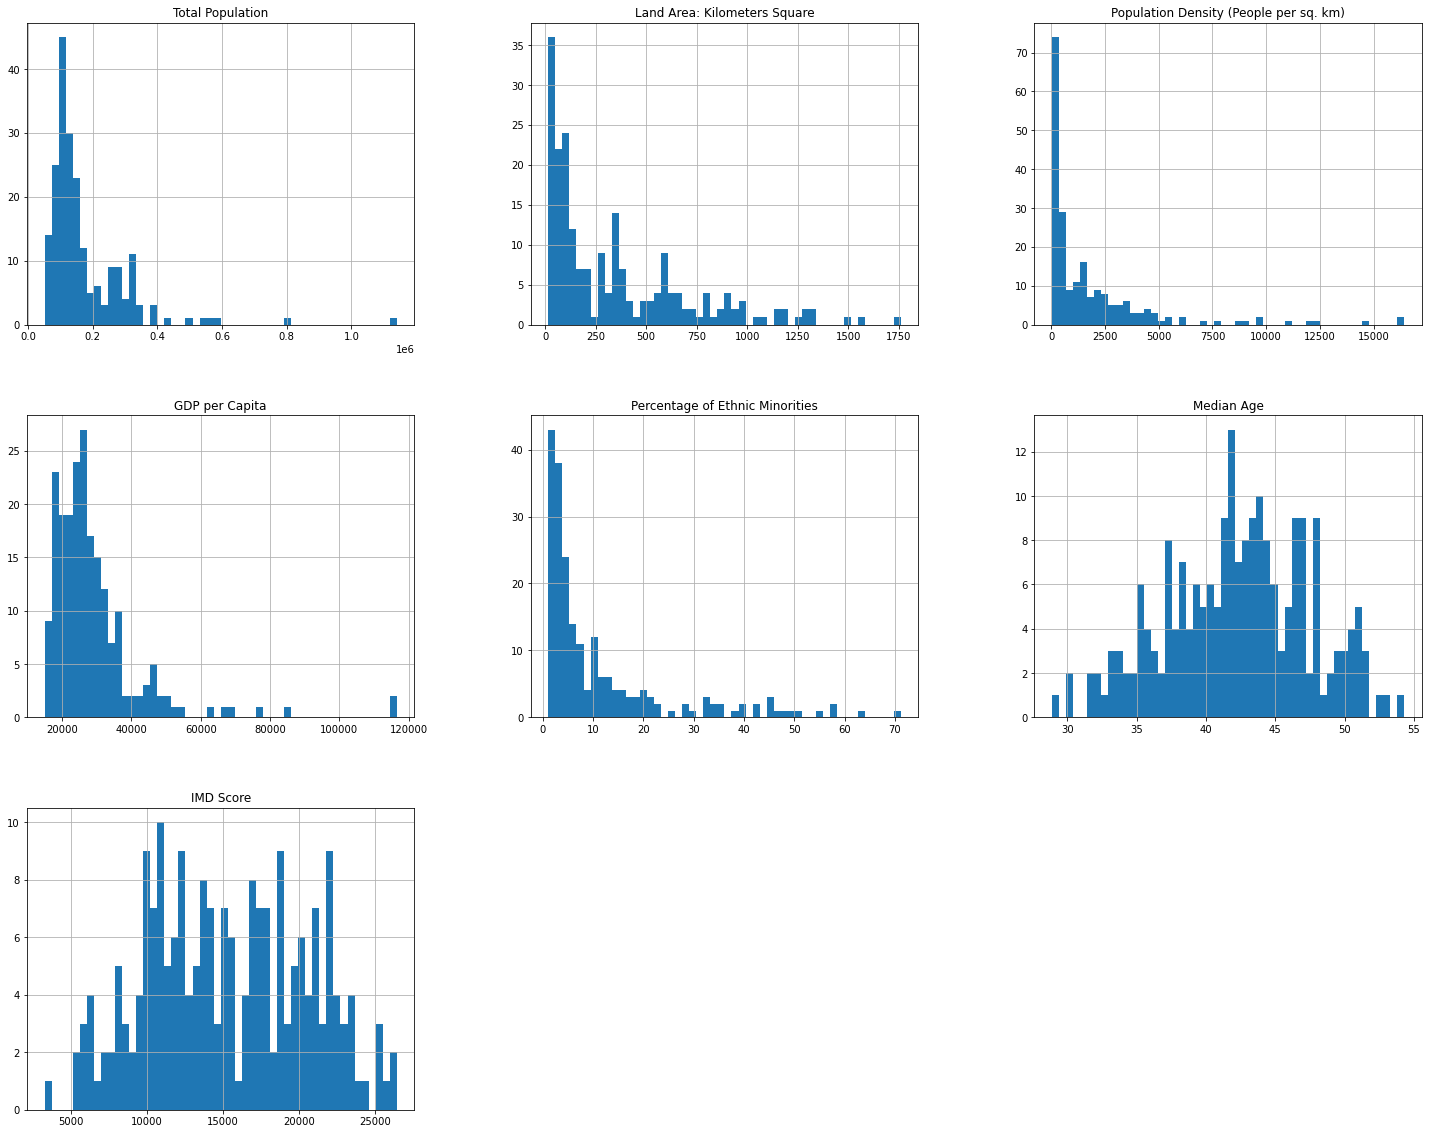

In [14]:
features.hist(bins=50,figsize=(25,20)) # Histogram of features/predictors

In [15]:
targets= data_merge1[['Data Traffic (TB)']]

In [16]:
targets

,Data Traffic (TB)
Local Authority,
Birmingham,11434
Leeds,7165
Manchester,6417
Tower Hamlets,5197
Liverpool,5108
...,...
West Devon,412
Ribble Valley,405
Copeland,387


# Splitting Data into Train and Test

In [17]:
from sklearn.model_selection import train_test_split

train_features, test_features = train_test_split(features, test_size= 0.3, random_state=50)
print(len(train_features))
print(len(test_features))

146
63


In [18]:
train_targets, test_targets = train_test_split(targets, test_size= 0.3, random_state=50)
print(len(train_targets))
print(len(test_targets))

146
63


In [19]:
train_features

,Total Population,Land Area: Kilometers Square,Population Density (People per sq. km),GDP per Capita,Percentage of Ethnic Minorities,Median Age,IMD Score
Local Authority,,,,,,,
Cannock Chase,101484,77.70,1277,22743,2.3,42.6,16898.74
Wyre Forest,101139,194.25,518,17302,2.7,46.8,17487.07
Three Rivers,93966,88.06,1051,50998,13.8,41.8,7742.20
North East Derbyshire,102216,277.13,368,17514,1.9,47.9,14111.11
Maidstone,173132,393.68,437,28954,5.9,41.4,13639.62
...,...,...,...,...,...,...,...
North Devon,98170,1085.21,89,25239,2.1,48.0,17090.24
Wolverhampton,264407,69.93,3793,21802,31.9,37.8,23274.95
Exeter,133333,46.62,2794,43783,6.9,33.6,13406.01


In [20]:
train_targets

,Data Traffic (TB)
Local Authority,
Cannock Chase,680
Wyre Forest,599
Three Rivers,713
North East Derbyshire,795
Maidstone,1484
...,...
North Devon,871
Wolverhampton,2318
Exeter,975


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
   ('std_scaler',StandardScaler())])

cleantraining=pipeline.fit_transform(train_features)

print(cleantraining.shape)

(146, 7)


In [22]:
newclean=pd.DataFrame(cleantraining)

In [23]:
data_merge1.to_csv('complete dataset.csv')

In [24]:
EDAOS=newclean.describe()
EDAOS

,0,1,2,3,4,5,6
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,5.208923e-17,4.562560e-17,3.421920e-17,3.383899e-17,-3.802134e-17,7.452182e-16,4.821105e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-9.800963e-01,-9.487026e-01,-6.225535e-01,-9.599907e-01,-7.192820e-01,-2.379127e+00,-1.942050e+00
25%,-5.834595e-01,-7.564640e-01,-5.595571e-01,-5.081500e-01,-6.141547e-01,-6.539310e-01,-8.797381e-01
50%,-3.437243e-01,-2.714583e-01,-4.506122e-01,-2.269485e-01,-4.634722e-01,6.163333e-02,-7.554409e-02
75%,3.668420e-01,5.680426e-01,1.277210e-01,1.397763e-01,4.989947e-02,7.771976e-01,8.228760e-01
max,7.612776e+00,3.799063e+00,4.699671e+00,5.946922e+00,4.186659e+00,1.992677e+00,2.123795e+00


In [25]:
#EDAOS.to_csv('standatdized EDA.csv')

# Training OLS Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
lin_regressor=LinearRegression()

olsmse = cross_val_score(lin_regressor,cleantraining, train_targets, scoring='neg_mean_squared_error', cv=10)   
olsrmse_scores = np.sqrt(-olsmse)
def display_scores(scores):
    print('Mean rmse:',scores.mean())
print('OLS regression model score:')
display_scores(olsrmse_scores)

OLS regression model score:
Mean rmse: 248.00006030587707


In [27]:
lin_regressor.fit(cleantraining, train_targets)
some_data = train_features.iloc[:5]
some_labels= train_targets.iloc[:5]
some_data_prepared = pipeline.transform(some_data)
print("Predictions:",lin_regressor.predict(some_data_prepared))
print("Labels: ",some_labels)

Predictions: [[ 586.36014469]
 [ 549.14091235]
 [ 762.48318034]
 [ 523.70687952]
 [1333.39562639]]
Labels:                         Data Traffic (TB)
Local Authority                         
Cannock Chase                        680
Wyre Forest                          599
Three Rivers                         713
North East Derbyshire                795
Maidstone                           1484


# Testing and Evaluating OLS Regression Model on Test Data

In [29]:
final_model=lin_regressor
final_model.fit(cleantraining, train_targets)
test_prepared = pipeline.fit_transform(test_features)
final_predictions=final_model.predict(test_prepared)
final_mse = mean_squared_error(test_targets,final_predictions)
final_rsme = np.sqrt(final_mse)
print('Root mean squared error for test data is:', final_rsme)
print("R2 Score is:", r2_score(test_targets, final_predictions))
R2_Score= r2_score(test_targets, final_predictions)
print('Linear Regression Model has an accuracy of', R2_Score*100,'%', 'based on R2 Score')


Root mean squared error for test data is: 297.8062710664271
R2 Score is: 0.9409356860542935
Linear Regression Model has an accuracy of 94.09356860542934 % based on R2 Score


In [30]:
final_predictions=final_predictions.tolist() # Convert array to list

Text(0.5, 1.0, 'Predicted vs Actual (Test Data)')

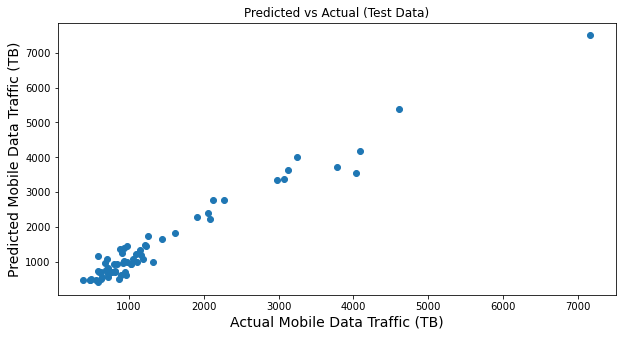

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(test_targets, final_predictions)
plt.xlabel('Actual Mobile Data Traffic (TB)', fontsize=14)
plt.ylabel('Predicted Mobile Data Traffic (TB)', fontsize=14)
plt.title('Predicted vs Actual (Test Data)')

# Feature Importance OLS Regression

In [32]:
coefficients = lin_regressor.coef_
coefficients=coefficients.tolist() # Convert array to list
coefficients=sum(coefficients, []) # Flatten list of list to just a list

In [33]:
feature_importances=np.abs(coefficients) # Absolute values of coefficients
num_attribs=list(train_features)
feature_importances


array([1163.60866602,  123.24408353,  218.66596192,  148.98476884,
        146.50897425,   27.36796856,   80.33635146])

In [34]:
Rank_of_features=sorted(zip(feature_importances, num_attribs), reverse= True)[:7] # Rank most important features
ranking=Rank_of_features[0][0], Rank_of_features[1][0], Rank_of_features[2][0], Rank_of_features[3][0],Rank_of_features[4][0], Rank_of_features[5][0], Rank_of_features[6][0]
ranking_list=list(ranking)
ranking_list
ranked_features=Rank_of_features[0][1],Rank_of_features[1][1],Rank_of_features[2][1],Rank_of_features[3][1],Rank_of_features[4][1],Rank_of_features[5][1],Rank_of_features[6][1]
ranked_features_list=list(ranked_features)
ranked_features_list
shortened_ranked_features_list= ['Total Population', 'Population Density', 'GDP per Capita', '% of Ethnic Minorities', 'Land Area', 'IMD Score', 'Median Age']
shortened_ranked_features_list

['Total Population',
 'Population Density',
 'GDP per Capita',
 '% of Ethnic Minorities',
 'Land Area',
 'IMD Score',
 'Median Age']

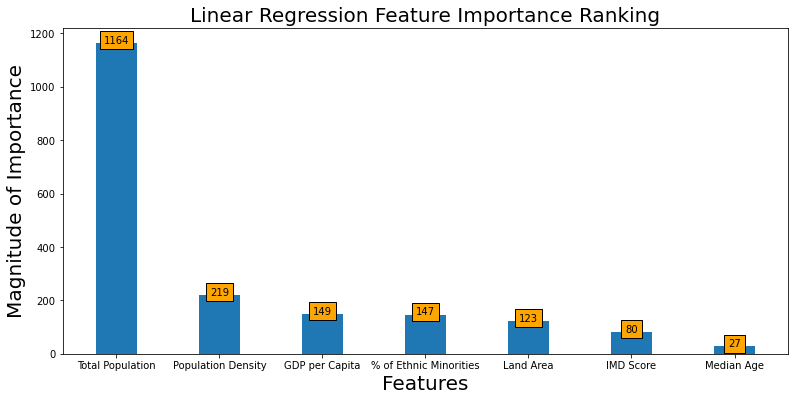

In [35]:
fig = plt.figure(figsize = (13, 6))
def addlabels(x,y):
     for i in range(len(x)):
             plt.text(round(i),round(y[i]),round(y[i]), ha='center',bbox=dict(facecolor='orange'))
# creating the bar plot
plt.bar(shortened_ranked_features_list, ranking_list, 
        width = 0.4, align='center')
addlabels(shortened_ranked_features_list, ranking_list)
 
plt.xlabel("Features", fontsize=20)
plt.ylabel("Magnitude of Importance", fontsize=20)
plt.title("Linear Regression Feature Importance Ranking", fontsize=20)
plt.show()

In [36]:
final_predictions=sum(final_predictions, []) # Flatten list of list to just a single list

In [37]:
# Getting all models predicted targets for test set
pred_targets_df=pd.DataFrame({'Actual Targets':test_targets['Data Traffic (TB)'], 'Model Predicted Targets':final_predictions, 
                              '% Difference': abs((test_targets['Data Traffic (TB)']-final_predictions)/(test_targets['Data Traffic (TB)'])*100)})
sample_pred_targets=pred_targets_df[7:13]
sample_pred_targets1=pred_targets_df[1:7]
sample_pred_targets2=pred_targets_df[13:19]
sample_pred_targets3=pred_targets_df[19:25]
sample_pred_targets4=pred_targets_df[25:31]
sample_pred_targets5=pred_targets_df[31:37]
sample_pred_targets6=pred_targets_df[37:43]
sample_pred_targets7=pred_targets_df[43:49]
sample_pred_targets8=pred_targets_df[49:55]
sample_pred_targets9=pred_targets_df[55:63]

pred_targets_df

,Actual Targets,Model Predicted Targets,% Difference
Local Authority,,,
Rushmoor,877,1366.081000,55.767503
Kirklees,3248,4004.349510,23.286623
Croydon,4093,4179.872164,2.122457
Hounslow,3124,3632.623627,16.281166
Knowsley,1146,1334.320229,16.432830
...,...,...,...
Mid Suffolk,589,736.844494,25.100933
Ipswich,979,1456.716155,48.796339
Dartford,1316,1014.102178,22.940564


# Showing Performance of the model agaisnt Actual Values

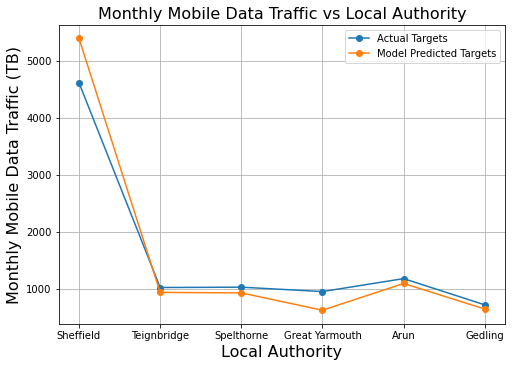

In [38]:
# Actual and predicted first set
plt.rcParams["figure.figsize"]=(8,5.5)
sample_pred_targets[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=16)
plt.xlabel('Local Authority', fontsize=16)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=16)
plt.grid(True)
plt.show()

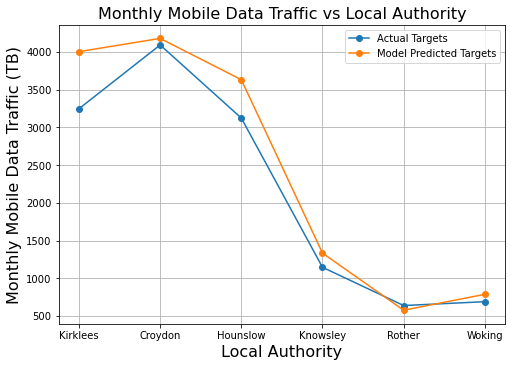

In [39]:
# Actual and predicted second set
plt.rcParams["figure.figsize"]=(8,5.5)
sample_pred_targets1[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=16)
plt.xlabel('Local Authority', fontsize=16)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=16)
plt.grid(True)
plt.show()

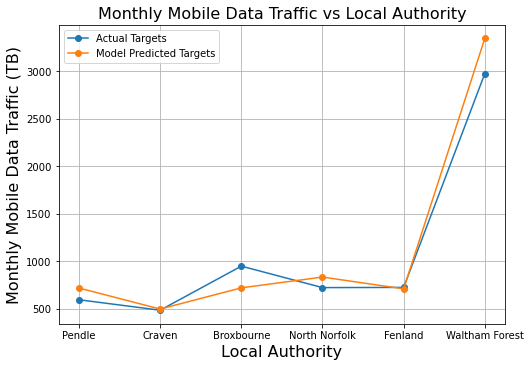

In [40]:
# Actual and predicted third set
plt.rcParams["figure.figsize"]=(8,5.5)
sample_pred_targets2[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=16)
plt.xlabel('Local Authority', fontsize=16)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=16)
plt.grid(True)
plt.show()

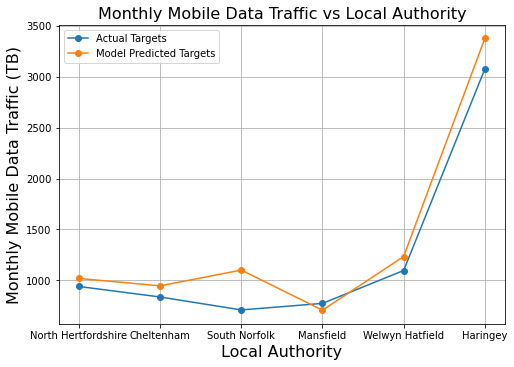

In [41]:
# Actual and predicted fourth set
plt.rcParams["figure.figsize"]=(8,5.5)
sample_pred_targets3[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=16)
plt.xlabel('Local Authority', fontsize=16)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=16)
plt.grid(True)
plt.show()

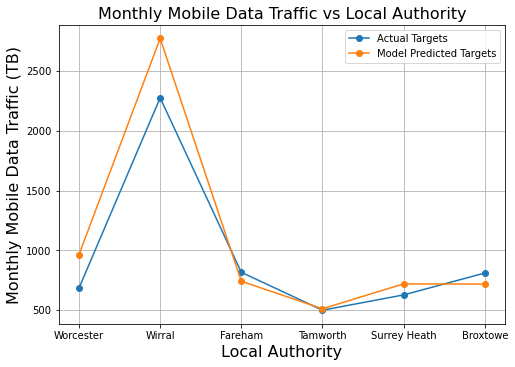

In [42]:
# Actual and predicted fifth set
plt.rcParams["figure.figsize"]=(8,5.5)
sample_pred_targets4[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=16)
plt.xlabel('Local Authority', fontsize=16)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=16)
plt.grid(True)
plt.show()

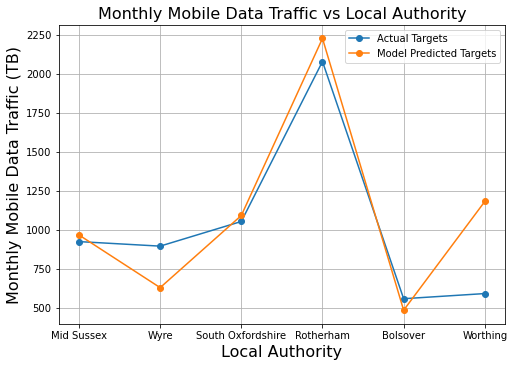

In [43]:
# Actual and predicted sixth set
plt.rcParams["figure.figsize"]=(8,5.5)
sample_pred_targets5[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=16)
plt.xlabel('Local Authority', fontsize=16)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=16)
plt.grid(True)
plt.show()

# Training Random Forest Regression Model


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Using Grid Search to determine the best random forest model
param_grid  = [{'n_estimators': [10, 25, 40, 55, 70, 85, 100,115,130, 145, 160, 175],'max_features':[1,2,3,4,5,6,7]}, 
               {'bootstrap': [False],'n_estimators':[10, 25, 40, 55, 70, 85, 100, 115, 130, 145, 160, 175],
                'max_features':[1,2,3,4,5,6,7]}]

forest_reg=RandomForestRegressor(random_state=3)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(cleantraining, train_targets.squeeze())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=3),
             param_grid=[{'max_features': [1, 2, 3, 4, 5, 6, 7],
                          'n_estimators': [10, 25, 40, 55, 70, 85, 100, 115,
                                           130, 145, 160, 175]},
                         {'bootstrap': [False],
                          'max_features': [1, 2, 3, 4, 5, 6, 7],
                          'n_estimators': [10, 25, 40, 55, 70, 85, 100, 115,
                                           130, 145, 160, 175]}],
             scoring='neg_mean_squared_error')

In [45]:
# Retrieving best parameters from GridSearchCV
grid_search.best_params_

{'max_features': 4, 'n_estimators': 160}

In [46]:
# Displaying best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=160, random_state=3)

In [47]:
# re-train random forest with best parameters gotten from grid search
bestforest_reg=grid_search.best_estimator_

In [48]:
# Use cross validation to get rmse values for random forest model
forestscores=cross_val_score(bestforest_reg, cleantraining, train_targets.squeeze(),scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forestscores)
print('Random Forest rmse scores:')
display_scores(forest_rmse_scores)


Random Forest rmse scores:
Mean rmse: 428.8064831139579


# Testing and Evaluating Random Forest Regression Model on Test Data

In [49]:
randomforest_reg=grid_search.best_estimator_
randomforest_reg.fit(cleantraining, train_targets.squeeze())
rftest_prepared = pipeline.fit_transform(test_features)
rffinal_predictions=randomforest_reg.predict(test_prepared)
randomforest_mse = mean_squared_error(test_targets,rffinal_predictions)
randomforest_rsme = np.sqrt(randomforest_mse)
print('Random Forest root mean squared error for test data is:', randomforest_rsme)
print("R2 Score is:", r2_score(test_targets, rffinal_predictions))
R2_Scorerf= r2_score(test_targets, rffinal_predictions)
print('Random Forest Regression Model has an accuracy of', R2_Scorerf*100,'%', 'based on R2 Score')

Random Forest root mean squared error for test data is: 512.442242962338
R2 Score is: 0.8251171052482539
Random Forest Regression Model has an accuracy of 82.51171052482539 % based on R2 Score


In [50]:
rffinal_predictions=rffinal_predictions.tolist() # Convert array to list

Text(0.5, 1.0, 'Predicted vs Actual (Test Data)')

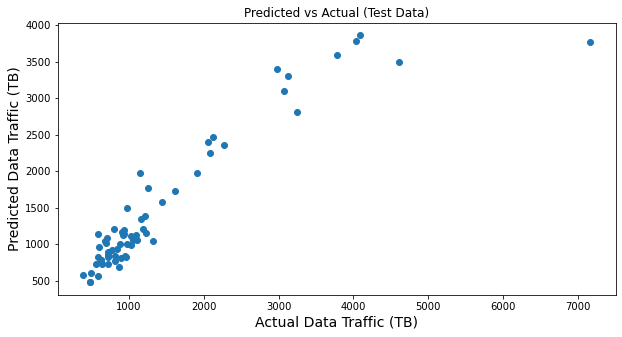

In [51]:
# Plotting model prediction vs actual 
plt.figure(figsize=(10,5))
plt.scatter(test_targets, rffinal_predictions)
plt.xlabel('Actual Data Traffic (TB)', fontsize=14)
plt.ylabel('Predicted Data Traffic (TB)', fontsize=14)
plt.title('Predicted vs Actual (Test Data)')

# Getting Feature Importance for Random Forest

In [52]:
rffeature_importances = grid_search.best_estimator_.feature_importances_
rffeature_importances

array([0.47615739, 0.03428191, 0.11521808, 0.0190897 , 0.18734582,
       0.07417905, 0.09372806])

In [53]:
rfRank_of_features=sorted(zip(rffeature_importances,num_attribs),reverse=True)[:8]
rfRank_of_features

[(0.4761573881874059, 'Total Population'),
 (0.18734581504345454, 'Percentage of Ethnic Minorities'),
 (0.11521807520085939, 'Population Density (People per sq. km)'),
 (0.09372806414065686, 'IMD Score'),
 (0.0741790520035272, 'Median Age'),
 (0.034281907082745894, 'Land Area: Kilometers Square'),
 (0.01908969834135019, 'GDP per Capita')]

In [54]:
rfranking=rfRank_of_features[0][0], rfRank_of_features[1][0], rfRank_of_features[2][0], rfRank_of_features[3][0],rfRank_of_features[4][0], rfRank_of_features[5][0], rfRank_of_features[6][0]
rfranking_list=list(rfranking)
rfranking_list
rfshortened_ranked_features_list= ['Total Population', '% of Ethnic Minorities', 'Population Density', 'IMD Score', 'Median Age', 'Land Area',  'GDP per Capita']
rfshortened_ranked_features_list

['Total Population',
 '% of Ethnic Minorities',
 'Population Density',
 'IMD Score',
 'Median Age',
 'Land Area',
 'GDP per Capita']

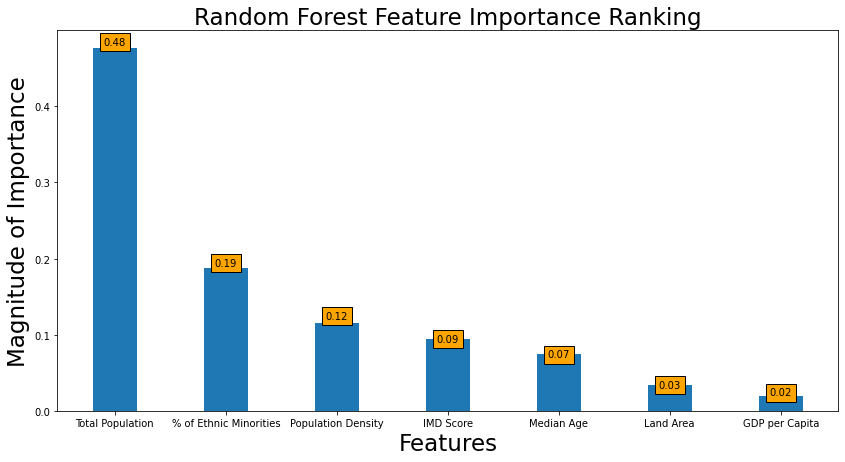

In [55]:
fig = plt.figure(figsize = (14, 7))
def addlabels(x,y):
     for i in range(len(x)):
             plt.text(round(i,2),round(y[i],2),round(y[i],2), ha='center',bbox=dict(facecolor='orange'))
# creating the bar plot
plt.bar(rfshortened_ranked_features_list, rfranking_list, 
        width = 0.4, align='center')
addlabels(rfshortened_ranked_features_list, rfranking_list)
 
plt.xlabel("Features", fontsize=23)
plt.ylabel("Magnitude of Importance", fontsize=23)
plt.title("Random Forest Feature Importance Ranking", fontsize= 23)
plt.show()

# Random Forest Model Predictions for Test set

In [56]:
# Getting all model predicted targets for test set
rfpred_targets_df=pd.DataFrame({'Actual Targets':test_targets['Data Traffic (TB)'], 'Model Predicted Targets':rffinal_predictions, 
                              '% Difference': abs((test_targets['Data Traffic (TB)']-rffinal_predictions)/(test_targets['Data Traffic (TB)'])*100)})
rfsample_pred_targets=rfpred_targets_df[7:13]
rfsample_pred_targets1=pred_targets_df[1:7]
rfsample_pred_targets2=pred_targets_df[13:19]
rfsample_pred_targets3=pred_targets_df[19:25]
rfsample_pred_targets4=pred_targets_df[25:31]
rfsample_pred_targets5=pred_targets_df[31:37]
rfsample_pred_targets6=pred_targets_df[37:43]
rfsample_pred_targets7=pred_targets_df[43:49]
rfsample_pred_targets8=pred_targets_df[49:55]
rfsample_pred_targets9=pred_targets_df[55:63]
rfpred_targets_df

,Actual Targets,Model Predicted Targets,% Difference
Local Authority,,,
Rushmoor,877,1001.30000,14.173318
Kirklees,3248,2811.91875,13.426147
Croydon,4093,3861.45000,5.657220
Hounslow,3124,3299.53125,5.618798
Knowsley,1146,1977.95625,72.596531
...,...,...,...
Mid Suffolk,589,823.77500,39.859932
Ipswich,979,1498.81250,53.096272
Dartford,1316,1037.36250,21.173062


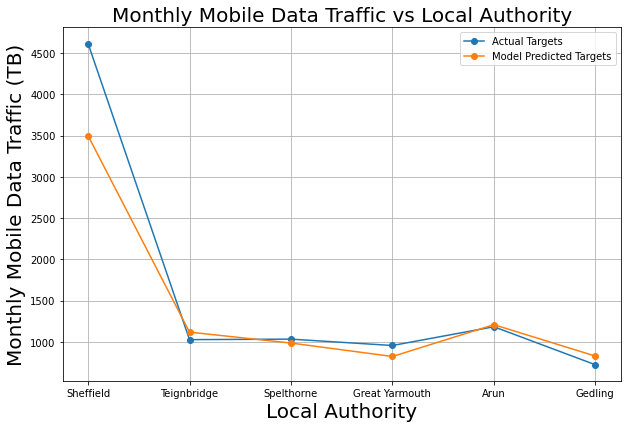

In [57]:
# Actual vs predicted first set
plt.rcParams["figure.figsize"]=(10,6.5)
rfsample_pred_targets[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=20)
plt.xlabel('Local Authority', fontsize=20)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=20)
plt.grid(True)
plt.show()

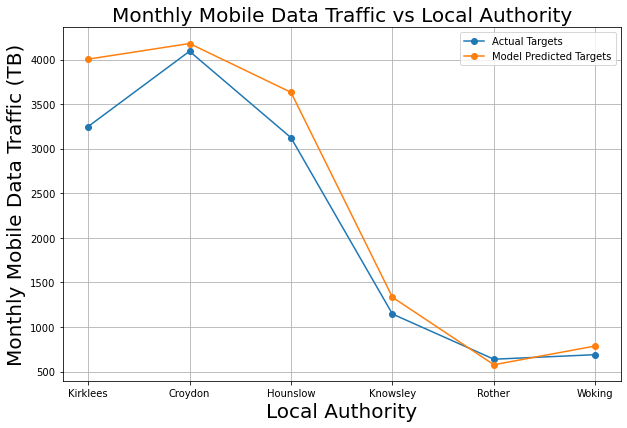

In [58]:
# Actual vs predicted second set
plt.rcParams["figure.figsize"]=(10,6.5)
rfsample_pred_targets1[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=20)
plt.xlabel('Local Authority', fontsize=20)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=20)
plt.grid(True)
plt.show()

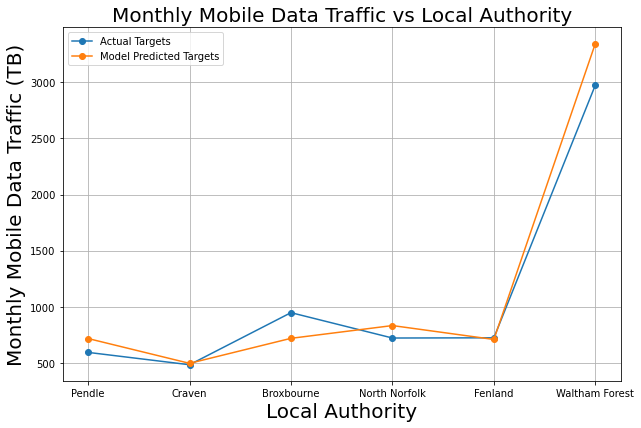

In [59]:
# Actual vs predicted third set
plt.rcParams["figure.figsize"]=(10,6.5)
rfsample_pred_targets2[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=20)
plt.xlabel('Local Authority', fontsize=20)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=20)
plt.grid(True)
plt.show()

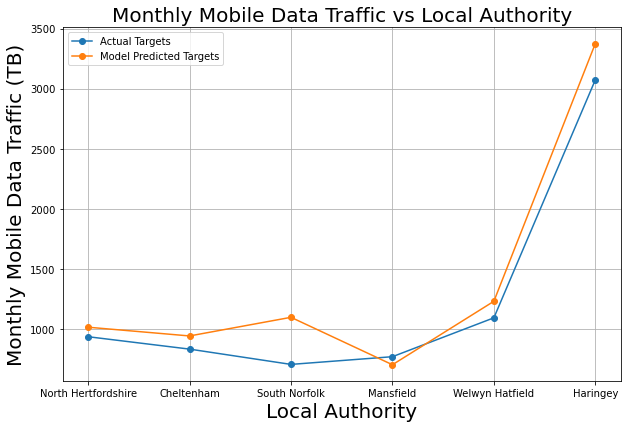

In [60]:
# Actual vs predicted fourth set
plt.rcParams["figure.figsize"]=(10,6.5)
rfsample_pred_targets3[['Actual Targets', 'Model Predicted Targets']].plot(marker='o')
plt.title('Monthly Mobile Data Traffic vs Local Authority', fontsize=20)
plt.xlabel('Local Authority', fontsize=20)
plt.ylabel('Monthly Mobile Data Traffic (TB)', fontsize=20)
plt.grid(True)
plt.show()